In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic_data_set.csv')

In [3]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [4]:
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [5]:
df.groupby(['Pclass', 'Sex']).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


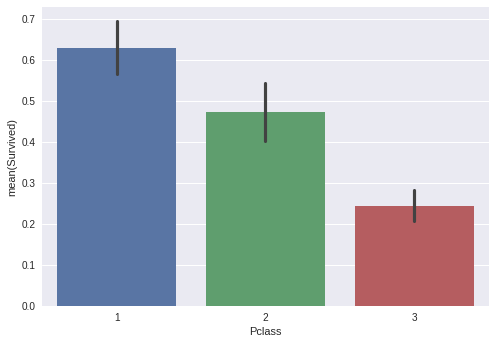

In [8]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df)

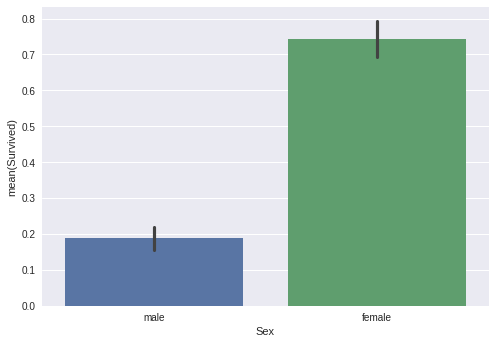

In [9]:
sns.barplot(x = 'Sex', y = 'Survived', data = df)

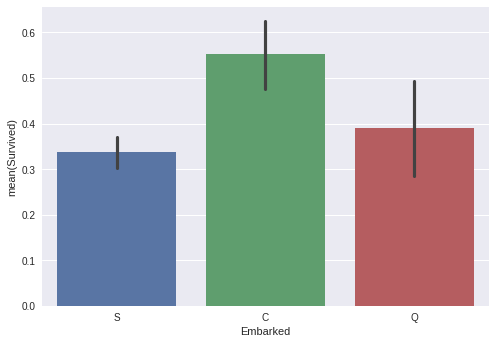

In [10]:
sns.barplot(x = 'Embarked', y = 'Survived', data = df)

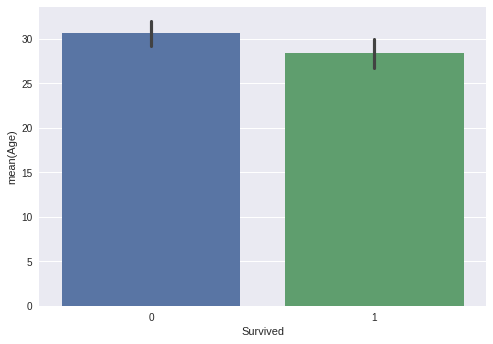

In [11]:
sns.barplot(x = 'Survived', y = 'Age', data = df)

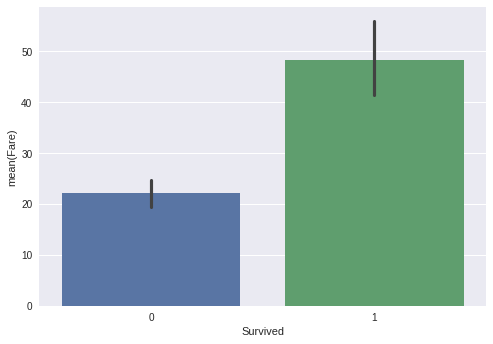

In [12]:
sns.barplot(x = 'Survived',y = 'Fare', data = df)

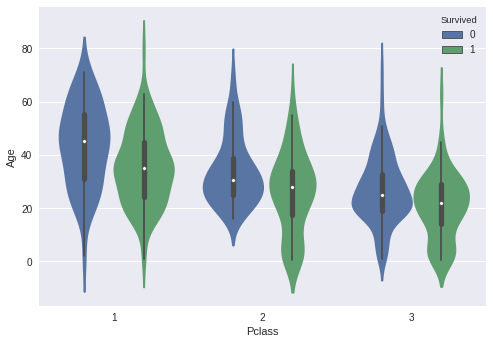

In [13]:
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df)

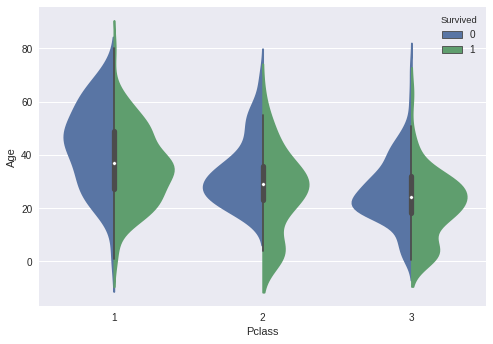

In [14]:
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df, split = True)

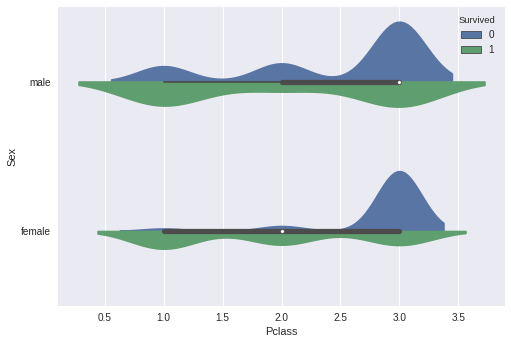

In [15]:
sns.violinplot(x = 'Pclass', y = 'Sex', hue = 'Survived', data = df, split = True)

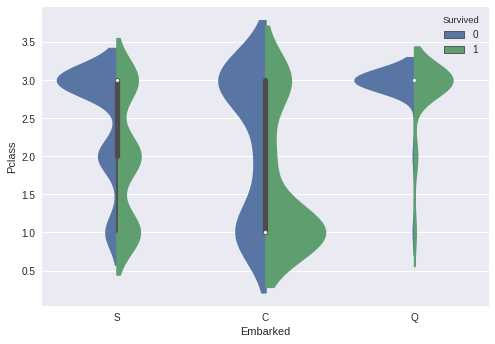

In [16]:
sns.violinplot(x = 'Embarked', y = 'Pclass', hue = 'Survived', data = df, split = True)

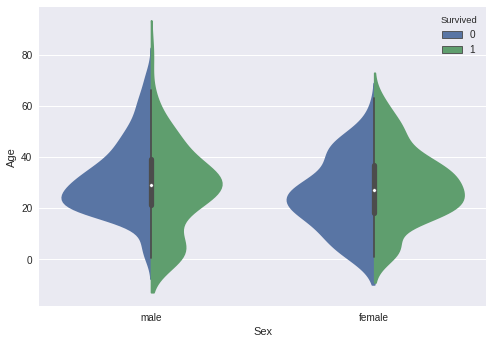

In [17]:
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df, split = True)

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 5:6])
df.iloc[:, 5:6] = imputer.transform(df.iloc[:, 5:6])

In [20]:
df['Embarked'] = df['Embarked'].fillna('S')

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
encoder_embarked = LabelEncoder()
df['Embarked'] = encoder_embarked.fit_transform(df['Embarked'])

In [22]:
df = pd.get_dummies(df, columns = ['Pclass', 'Embarked'])

In [23]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

In [24]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,2
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,1


In [25]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', ], axis = 1)

In [26]:
df.to_csv('titanic_processed_data.csv', index = 0)